# Data Preprocessing

- Whenever you build a Machine Learning model, the **first step** is to **preprocess** the chosen dataset.

- Data Preprocessing must be done in the **right way**, so that the model trains with the right data.

## Importing Libraries

- The following libraries are used in Data Preprocessing steps, and during building models:

    - **`numpy`**: allows us to work to **arrays**, which many ML models expect as parameters.
    
    - **`matplotlib`**: allows us to create nice **charts and graphs** for visualization.
    
    - **`pandas`**: helps us in **importing** the dataset, and in creating the **Matrix of Features and the Dependent Variable vector**.
    
    - **`scikitlearn`**: this package contains most of the **tools and algorithms** required for majority of ML usecases.
    
- At a global level, we usually dont import `scikitlearn`, but we do so whenever needed, at the corresponding step.

In [21]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

- Most of the times, our dataset exists as a **CSV file or an Excel file**.

- First step is to import the entire dataset into a **`Pandas Dataframe`**.

- For demonstration, we will make use a survey about a product, which indicates if a customer from a certain country, with a given age and salary, has purchased the product or not.

In [22]:
# import entire dataset
dataset = pd.read_csv('product_purchase_survey.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


- Any ML dataset has two entities: **Features (Independent Variables) and the Dependent Variable**.

    - Features are the variables(or the columns) with which the Dependent Variable is predicted.
    
- Therefore, in our code, we create two entities:

    - **Matrix of Features**, denoted by **`X`**.
    
    - **Dependent Variable Vector**, denoted by **`y`**.
    
- We create these two entities because most of the ML models expect these as inputs.
    
- Use indexing, or **`iloc`** method on a pandas dataframe to do this.

In [23]:
# get the Matrix of Features
X = dataset.iloc[:, :-1].values

# get the Dependent Variable Vector
y = dataset.iloc[:, -1].values

In [24]:
print(type(X))
print(X)

<class 'numpy.ndarray'>
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [25]:
print(type(y))
print(y)

<class 'numpy.ndarray'>
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Handling Missing Data

- Missing values can cause errors while training the Machine Learning model.

- We have various strategies to deal with missing values, the most common one for numerical features being, replacing the missing value with the **mean** of the column.

- To do this, we use `scikit-learn` package, which has a **`SimpleImpute`** class, to perform Univariate Feature Imputation. It is available in the **`impute`** module.

- [SimpleImputer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

- `SimpleImputer` handles missing data by mean, or median, or mode, or a constant value.

- For doing this, we do the following steps:

    - Create an object of `SimpleImputer` class.
    
    - **`fit`** on the Matrix of Features. This calculates the replacement.
    
    - **`transform`** the Matrix of Features, which actually applies the transformation.
    
- During object creation:

    - **`missing_values`** specifies the missing values to be replaced.
    
    - **`strategy`** specify the replacement method.
    
- We can do `fit` and `transform` in two different steps, or in a single step using **`fit_transform()`** method.
    
- We can use **`most_frequent`** strategy to deal with missing value in a categorical column.

In [26]:
# visualising missing data
pd.isna(X)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

- Since our `Country` column has no missing values, we can just apply the `fit_transform` on the numerical columns.

In [27]:
# handle missing data -> replace with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

X[:, 1:] = imputer.fit_transform(X[:, 1:])

In [28]:
print(type(X))
print(X)

<class 'numpy.ndarray'>
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding Categorical Data

- Lets have a look at our dataset:

In [29]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


- Notice that `Country` and `Purchased` are **categorical variables**.

- Most ML models do not accept a categorical variable as a string, hence we need to do something about it.

- We have to convert those strings into **numbers, or labels**.

- We might want to do the following simple encoding for `Country` column:

    - Encode `France` as `0`, `Spain` as `1` and `Germany` as `2`. This actually leads to misinterpretation by the ML model because it might think that `0`, `1`, `2` are priorities, or weights but they are not.
    
- To avoid such misinterpretations, we do **One Hot Encoding**.

- On doing One Hot Encoding on the `Country` column, say it has `N` different classes, we get the following:

    - The `Country` column is converted into `N` columns, with each row representing a vector for a single class label.
    
    - For example, `France` may get the vector `[1 0 0]`, `Spain` gets `[0 1 0]` and `Germany` gets `[0 0 1]`.
    
- But if you look at the `Purchased` column, it has only `Yes` and `No`, which are Binary Class labels, so, doing a simple encoding like `1` for `Yes` and `0` for `No` works fine in Binary Categories. To do such a kind of encoding, we can use **Label Encoding**.

- So, we usually do the following:

    - For Independent Categorical Variables, do **One Hot Encoding**.
    
    - For Dependent Categorical Variables, do **Label Encoding**.

### Encoding the Independent Variable - One Hot Encoding

- We make use of two classes of `scikit-learn`:

    - **`ColumnTransformer`** (available in **`compose`** module)
    
    - **`OneHotEncoder`** (available in **`preprocessing`** module)
   
> **IMPORTANT POINT:** The columns which undergo One Hot Encoding are referred to as **Dummy Variables**.
   
- `ColumnTransformer` uses the following syntax in our case:

```python
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder', transformer, list_of_column_indices)], remainder='passthrough')
```

- Here, the `transformer` is **`OneHotEncoder()`**.

In [30]:
# Encode `Country` (Independent Variable) column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [0])],
    remainder = 'passthrough'
)

X = ct.fit_transform(X)

In [31]:
print(X)
print(type(X))

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
<class 'numpy.ndarray'>


### Encoding the Dependent Variable - Label Encoding

- We make use of **`LabelEncoder`**, available in **`sklearn.preprocessing`** module, which is specifically designed for target variables.

In [32]:
# Encode 'Purchased' (Dependent Variable) column
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

y = enc.fit_transform(y)

In [33]:
print(type(y))
print(y)

<class 'numpy.ndarray'>
[0 1 0 0 1 1 0 1 0 1]


## Splitting dataset into Training Set and Test Set

- A recommended split is:

    - **80%** of dataset for **training set**
    
    - **20%** of dataset for **test set**
    
- Here is a very frequently asked question: **Should feature scaling be applied before or after dataset splitting?**

    - It should be applied **after** splitting the dataset into training set and test set.
    
    - This is because, in Feature Scaling, the mean, standard deviation are calculated and if the entire dataset is used here, it leads to **Information Leakage**.
    
    - The test set must be completely anonymous and new to the ML model, so, we have to **avoid** information leakage.
    
- To split the dataset, we make use of **`train_test_split`** function available in **`sklearn.model_selection`**, with the following syntax:

```python
from sklearn.model_selection import train_test_split

train_test_split(*arrays, test_size = 0.2, random_state = 1)
```

- In place of `*arrays`, we pass in `X` and `y`.

- `test_size` specifies the fraction of samples for the test set.

- If `random_state` is set to `1`, the same training & test set are obtained for each execution of the function. (This is basically like setting the random seed)\

- It actaully returns a tuple, which can be unpacked by **`X_train, X_test, y_train, y_test`**.

In [34]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [35]:
print(len(X_train))
print(type(X_train))
print(X_train)

8
<class 'numpy.ndarray'>
[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [36]:
print(len(y_train))
print(type(y_train))
print(y_train)

8
<class 'numpy.ndarray'>
[0 1 0 0 1 1 0 1]


In [37]:
print(len(X_test))
print(type(X_test))
print(X_test)

2
<class 'numpy.ndarray'>
[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [38]:
print(len(y_test))
print(type(y_test))
print(y_test)

2
<class 'numpy.ndarray'>
[0 1]


## Feature Scaling

- It allows all our numerical features to be on the **same scale**, so that one feature doesnt unnecessarily dominate another feature in our ML model.

- Note that only certain datasets and models require feature scaling to be done.

- There are two main Feature Scaling techniques: Standardization and Normalization.

- **Standardization** usually works good when the features have a normal distribution, and is done using the below formula:

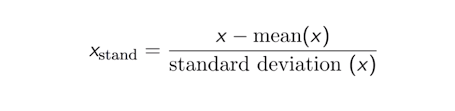

Here, $-3\le x_{stand}\le +3$.

- **Normalization** usually works good all the time, and is done using the below formula:

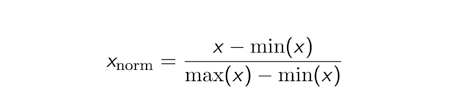

Here, $0\le x_{norm}\le +1$.

- **`sklearn.preprocessing`** module has the **`StandardScaler`** class and the **`Normalizer`** class.

- While doing Feature Scaling, we should:

    - `fit` on `X_train`
    
    - `transform` `X_train`
    
    - `transform` `X_test` (Note that we dont fit seperately. Doing so will cause information leakage).
    
- Also remember that Feature Scaling of Dummy Variables is **not** required.

In [39]:
# Apply Standardization (Feature Scaling) on Age and Salary columns
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train[:, 3:]) # ignore the dummy variable
X_train[:, 3:] = sc.transform(X_train[:, 3:])

X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [40]:
print(len(X_train))
print(type(X_train))
print(X_train)

8
<class 'numpy.ndarray'>
[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
